TOPIC- Gold Price Prediction 

Welcome. This Notebook will provide knowledge to novice Data Scientists with basic Machine Learning concepts like -

1.Data Exploratory Ananlysis

2.Principle Component Analysis

3.Prediction and Model selection

# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression



# EDA

In [2]:
dataset=pd.read_csv(r'C:\Users\CHAITANYA NANDANWAR\Downloads\gold.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [3]:
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
dataset.shape

(2290, 6)

In [7]:
dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
dataset.shape


(2290, 6)

In [10]:
for column in dataset.columns:
    print(column,dataset[column].nunique())

Date 2290
SPX 2277
GLD 1930
USO 1514
SLV 1331
EUR/USD 2066


Skewness: %f 0.3341383472692508
Kurtosis: -0.275081


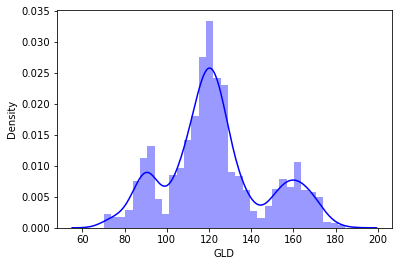

In [11]:
sns.distplot(dataset['GLD'], color = 'blue')
print('Skewness: %f', dataset['GLD'].skew())
print("Kurtosis: %f" % dataset['GLD'].kurt())

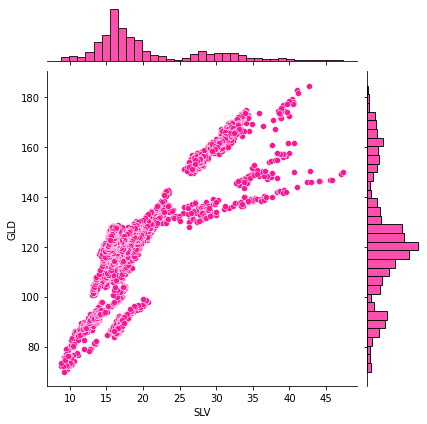

In [12]:
sns.jointplot(x =dataset['SLV'], y = dataset['GLD'], color = 'deeppink')


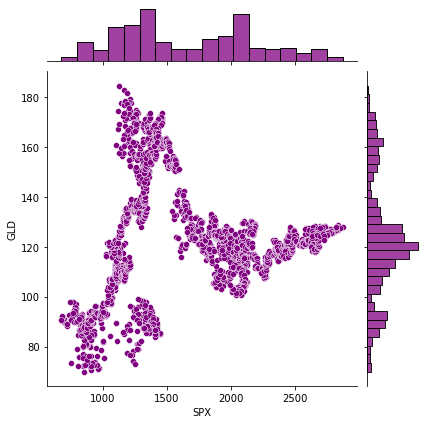

In [13]:
sns.jointplot(x =dataset['SPX'], y = dataset['GLD'], color = 'purple')


In [14]:
for col in dataset.select_dtypes(include='object').columns:
    print(col)
    print(dataset[col].unique())

Date
['1/2/2008' '1/3/2008' '1/4/2008' ... '5/10/2018' '5/14/2018' '5/16/2018']


In [15]:
categorical_features=[feature for feature in dataset.columns if ((dataset[feature].dtypes=='O')&(feature not in['GLD']))]
categorical_features

['Date']

In [16]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is Date and number of categories are 2290


Text(0.5, 1.05, 'Correlation of dataset Features')

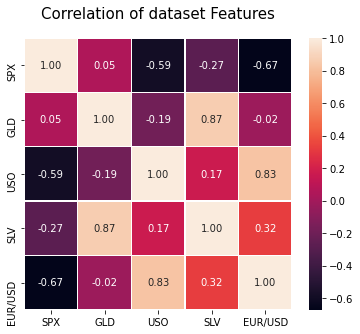

In [17]:
#correlation
corr = dataset.corr()
plt.figure(figsize = (6,5))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30)
plt.title('Correlation of dataset Features', y = 1.05, size=15)

In [18]:
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


Skewness: %f 0.3341383472692508


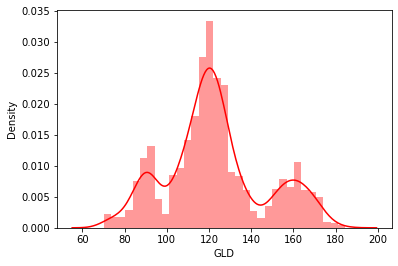

In [19]:
sns.distplot(dataset['GLD'], color = 'red')
print('Skewness: %f', dataset['GLD'].skew())

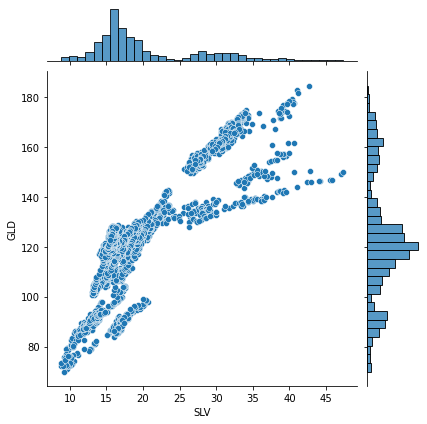

In [20]:
sns.jointplot(x =dataset['SLV'], y = dataset['GLD'])

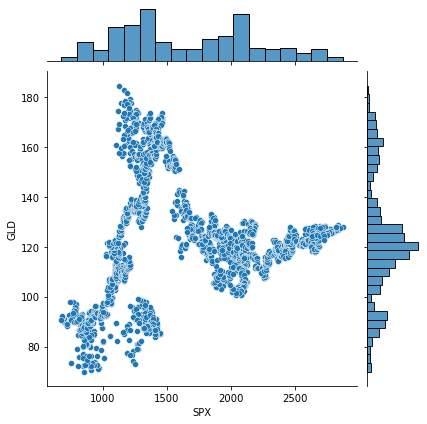

In [21]:
sns.jointplot(x =dataset['SPX'], y = dataset['GLD'])

# PREPARE THE DATASET

In [22]:
x = dataset.drop(['Date','GLD'],axis=1)
y = dataset['GLD']

In [23]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [24]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1832, 4) (458, 4) (1832,) (458,)


# PREDICTION ALGORITHM

In [26]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [27]:
y_pred = regressor.predict(x_test)
y_pred

array([127.17369872, 117.03389936, 139.77590048, 121.80430021,
        94.28420055, 154.64210072, 117.53250139, 113.21880132,
       153.44560037, 105.55930051, 103.12769936, 120.19890093,
        92.03859947, 158.36470147, 121.56879841, 117.47600086,
        86.60939843,  91.8822994 ,  92.99309998, 125.63560028,
        82.76509959, 117.79829877, 126.24419857, 172.9247973 ,
       169.4467973 , 139.96080203, 114.24879955, 159.97140249,
       133.81580042, 115.26880022, 111.20620071, 104.82370178,
       128.26950007, 122.26809947,  98.85759982, 120.11780006,
        84.40860007, 114.98310016, 127.6216985 , 140.25839874,
       107.89700056, 131.57470059, 108.4456996 , 135.38200086,
       133.42619923, 149.14169895, 119.63770059, 157.76180046,
       156.32630174, 127.7409999 , 123.8162    , 115.42939827,
       123.78470018, 119.24520005, 153.67820083, 121.53709943,
       112.57470043,  86.73539966, 155.40649981, 117.90790091,
        88.14889972, 114.66189996,  83.20639934, 146.64

In [28]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   1.2656360965938895
MSE :   4.77375122169772
RMAE :   2.184891581222675


In [29]:
error_score = metrics.r2_score(y_test, y_pred)
print("R squared error : ", error_score)

R squared error :  0.9907206589008251


In [30]:
accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print(accuracy_train)
print(accuracy_test)

0.9983490275490078
0.9907206589008251


In [31]:
regressor.score(x_test,y_test)

0.9907206589008251

In [32]:
test_data_prediction = regressor.predict(x_test)

In [33]:
linear = LinearRegression().fit(x_train, y_train)
print("Linear Regression model")
print("Gold ETF Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear Regression model
Gold ETF Price (y) = 0.01 * 3 Days Moving Average (x1) + -0.24 * 9 Days Moving Average (x2) + 68.56 (constant)


In [34]:
t = 0.8 
t = int(t*len(dataset)) 
# Train dataset 
x_train = x[:t] 
y_train = y[:t]  
# Test dataset 
x_test = x[t:] 
y_test = y[t:]

In [35]:
r2_score = linear.score(x[t:],y[t:])*100  
# float("{0:.2f}".format(r2_score))
print("R-squared of the model is:",r2_score,"%")
# R-squared is always between 0 and 100%. 
#A score close to 100% indicates that the model explains the Gold ETF prices well.

R-squared of the model is: 15.277911788058706 %


In [37]:
print (corr['GLD'].sort_values(ascending=False), '\n')


GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 

